In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
# 폰트 관련 용도
# import matplotlib.font_manager as fm
import cv2

import torch
from torch import nn, optim
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader
from torchvision.io import read_image
from torchvision import models, datasets, transforms
# from torchinfo import summary

# 기본 폰트 설정
# plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
import os
import cv2

import torch
from torch import nn, optim
from torchvision import models, datasets, transforms
from torchvision.io import read_image
import torchvision.transforms.functional as F

import time

In [3]:
dir(models.detection)

['FCOS',
 'FCOS_ResNet50_FPN_Weights',
 'FasterRCNN',
 'FasterRCNN_MobileNet_V3_Large_320_FPN_Weights',
 'FasterRCNN_MobileNet_V3_Large_FPN_Weights',
 'FasterRCNN_ResNet50_FPN_V2_Weights',
 'FasterRCNN_ResNet50_FPN_Weights',
 'KeypointRCNN',
 'KeypointRCNN_ResNet50_FPN_Weights',
 'MaskRCNN',
 'MaskRCNN_ResNet50_FPN_V2_Weights',
 'MaskRCNN_ResNet50_FPN_Weights',
 'RetinaNet',
 'RetinaNet_ResNet50_FPN_V2_Weights',
 'RetinaNet_ResNet50_FPN_Weights',
 'SSD300_VGG16_Weights',
 'SSDLite320_MobileNet_V3_Large_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'anchor_utils',
 'backbone_utils',
 'faster_rcnn',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcos',
 'fcos_resnet50_fpn',
 'generalized_rcnn',
 'image_list',
 'keypoint_rcnn',
 'keypointrcnn_resnet50_fpn',
 'mask_rcnn',
 'maskrcnn_resnet50_fpn'

In [4]:
weights = models.detection.SSD300_VGG16_Weights.COCO_V1
ssd300 = models.detection.ssd300_vgg16(weights = weights)

Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 138MB/s]


In [5]:
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor()
])

In [6]:
dataset = datasets.VOCDetection(root = "./VOC_dataset/VOC2012",
                                year = "2012",
                                image_set = "val", # Use "train", "val", or "trainval"
                                download=True,
                                transform = transform # Apply preprocessing pipeline
                                )

100%|██████████| 2.00G/2.00G [01:12<00:00, 27.4MB/s]


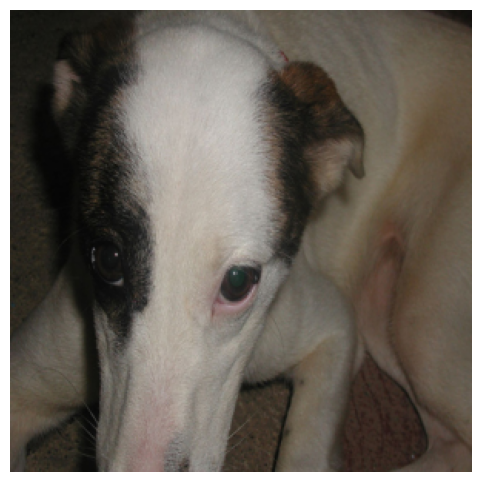

In [7]:
idx = torch.randint(len(dataset), size = (1, ))
image, annotation = dataset[idx.item()]


plt.imshow(image.permute(1, 2, 0))
plt.grid(None)
plt.axis("off")
plt.show()

In [11]:
import time

idx = torch.randint(len(dataset), size = (1, ))
image_jpg, annotation = dataset[idx.item()]
image = image_jpg.unsqueeze(0).to(device)

ssd300.eval()
start = time.time()
with torch.no_grad():
    prediction = ssd300(image)
stop = time.time()
print(f"estimation time = {(stop - start)*1000:.3f}ms")
prediction = prediction[0] # batch remove
prediction

estimation time = 1295.640ms


{'boxes': tensor([[ 32.5887,  20.8324, 294.2701, 299.9516],
         [ 30.3389,  15.7292, 300.0000, 296.9965],
         [ 60.6259, 197.8331, 144.1138, 267.1891],
         [ 46.7563, 225.6440, 136.8258, 286.2587],
         [ 28.6013,  15.7123, 300.0000, 297.7142],
         [ 62.9411, 196.5871, 119.5120, 239.9830],
         [ 57.6879, 228.7819, 122.0163, 266.2596],
         [ 69.2832, 210.7677, 107.3282, 269.2542],
         [ 56.0945, 198.9848,  93.0434, 257.5461],
         [ 57.1682, 213.0923, 127.7506, 250.2508],
         [ 26.9737,  61.9848, 102.2833,  96.3753],
         [ 56.0665, 243.0161, 121.0208, 280.4597],
         [ 87.6994, 210.0581, 120.9661, 270.3908],
         [ 83.9761, 232.4635, 124.9449, 283.7779],
         [ 98.9603, 213.9988, 141.7983, 270.7511],
         [ 98.9631, 194.7334, 139.3530, 249.6436],
         [ 71.6761, 258.5774, 134.1685, 292.4554],
         [133.3104,  27.4168, 202.2285,  54.9003],
         [ 54.3378, 228.6691,  91.1875, 288.6961],
         [236.8462, 23

[32, 20, 294, 299]


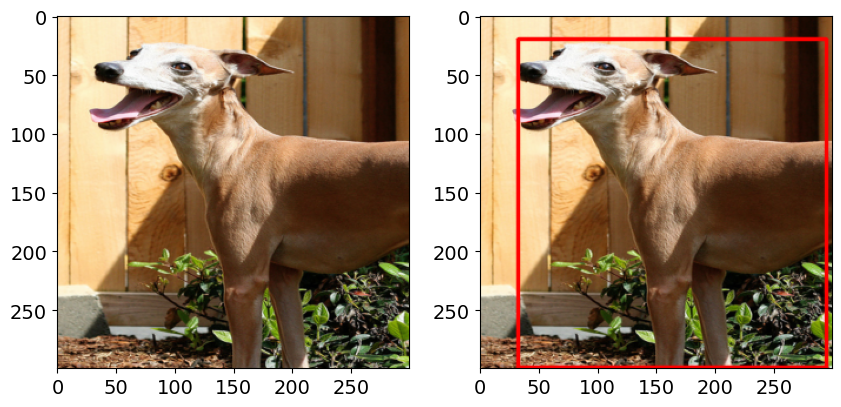

In [12]:

image = image.cpu().data[0]
image = transforms.functional.to_pil_image(image)
image = np.array(image)

threshold=0.5

for box, label, score in zip(prediction["boxes"], prediction["labels"], prediction["scores"]):
    if score > threshold:
        box = list(map(int, box))
        print(box)
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2, cv2.LINE_AA)

fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].imshow(image_jpg.permute(1, 2, 0))
axs[0].grid(None)
axs[1].imshow(image)
axs[1].grid(None)
plt.show()


In [13]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

#Vision Transformer(ViT)

In [3]:
weights = models.ViT_B_16_Weights.IMAGENET1K_V1
vit = models.vit_b_16(weights=weights)
print(vit)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

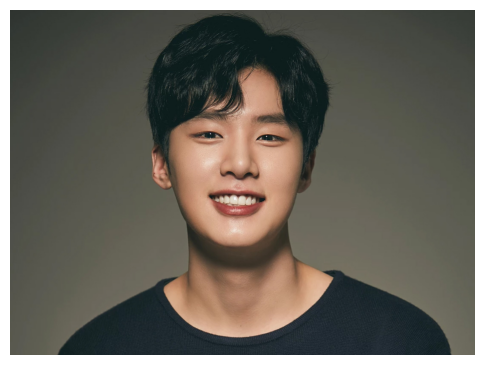

In [30]:
from PIL import Image

filename = 'dong_face.jpg'
img = Image.open(filename)

plt.imshow(img)
plt.axis("off")
plt.show()

In [31]:
preprocess = weights.transforms()
img_tensor = preprocess(img) # PIL to tensor
print("img tensor shape = ", img_tensor.shape)

img tensor shape =  torch.Size([3, 224, 224])


In [32]:
##
vit = vit.to(device)

vit.eval()

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [33]:
##
img_tensor = img_tensor.unsqueeze(0).to(device)

In [34]:
import time

start = time.time()
output = vit(img_tensor)
stop = time.time()

print(f"estimation time = {(stop-start)*1000:.3f}ms")

estimation time = 14.876ms


In [35]:
idx = output.argmax(-1)
score = output.softmax(-1)
print(idx)

tensor([610], device='cuda:0')


In [37]:
weights.meta['categories'][idx]
# score[0, idx]

'jersey'

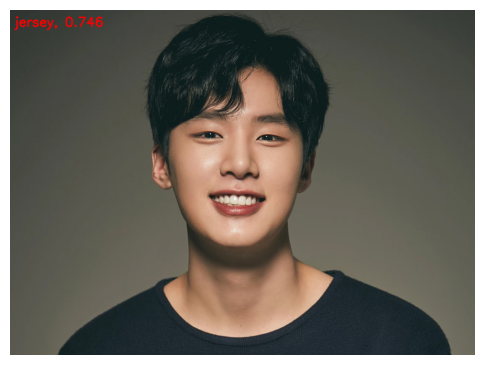

In [38]:
img_np = np.array(img) # PIL -> ndarray

text = f"{weights.meta['categories'][idx]}, {score[0, idx].item():.3f}"
cv2.putText(img_np, text, (10, 40), 0, 1, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(img_np)
plt.axis("off")
plt.show()

In [40]:
idx = np.array(weights.meta['categories']) == 'people'
idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [42]:
## model file
model = './yolo_v3/yolov3.weights'
config = './yolo_v3/yolov3.cfg'
class_labels = './yolo_v3/coco.names'

##
img_files = [
    "./figure/dog.jpg",
    "./figure/kite.jpg",
    "./figure/peoples.jpg",
    "./figure/person.jpg",
    "./figure/sheep.jpg",
    ]

display(img_files)

['./figure/dog.jpg',
 './figure/kite.jpg',
 './figure/peoples.jpg',
 './figure/person.jpg',
 './figure/sheep.jpg']

In [43]:
## read.yolov3

net = cv2.dnn.readNet(model, config)

if net.empty():
  print("Net load failed")
  # sys.exit()

In [52]:
## class name read

classes = []
with open(class_labels, 'rt') as f:
  classes = f.read().rstrip("\n").split("\n")

# display(classes)
# len(classes)
# classes[10]

'parking meter'

In [55]:
## output layer

net.getUnconnectedOutLayers()
layers_names = net.getLayerNames()
output_layers = [layers_names[i-1] for i in net.getUnconnectedOutLayers()]
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

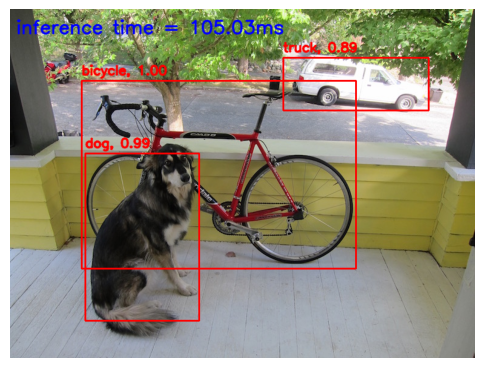

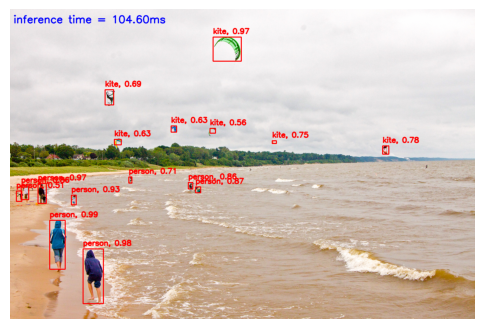

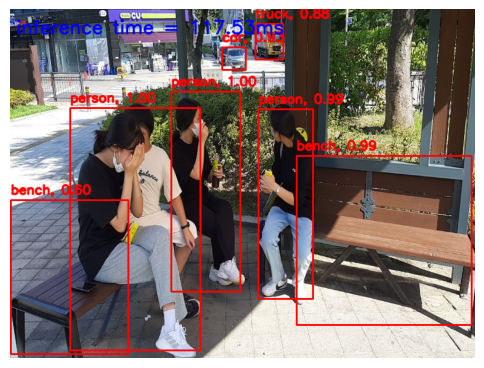

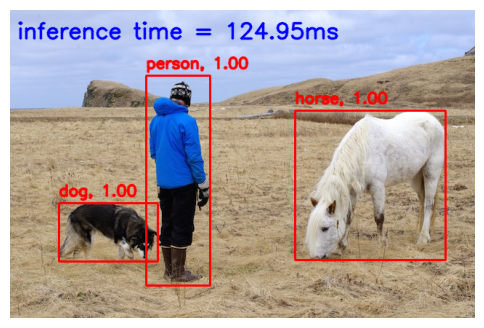

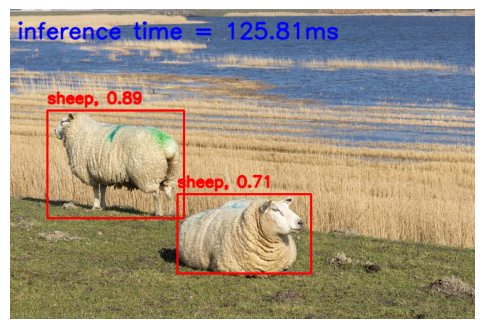

In [71]:
confThreshold = 0.5
nmsThreshold = 0.4

for i in img_files:
  img = cv2.imread(i) # BGR

  blob = cv2.dnn.blobFromImage(img, 1/255, (320, 320), swapRB=True) # RGB
  net.setInput(blob)
  outs = net.forward(output_layers) # ['yolo_82', 'yolo_94', 'yolo_106']

  h, w = img.shape[:2]

  class_ids = []
  confidences = []
  boxes = []

  for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]

      if confidence > confThreshold:
        cx = int(detection[0]*w)
        cy = int(detection[1]*h)
        bw = int(detection[2]*w)
        bh = int(detection[3]*h)

        sx = int(cx - bw/2)
        sy = int(cy - bh/2)

        boxes.append([sx, sy, bw, bh])
        confidences.append(confidence)
        class_ids.append(class_id)

  indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)

  for i in indices:
    sx, sy, bw, bh = boxes[i]
    label = f"{classes[class_ids[i]]}, {confidences[i]:.2f}"
    color = (0, 0, 255)
    cv2.rectangle(img, (sx, sy, bw, bh), color, 2)
    cv2.putText(img, label, (sx, sy-10), 0, 0.7, color, 2, cv2.LINE_AA)

  t,_ = net.getPerfProfile()
  prop_time = f"inference time = {t*1000/cv2.getTickFrequency():.2f}ms"
  cv2.putText(img, prop_time, (10, 40), 0, 1, (255, 0, 0), 2, cv2.LINE_AA)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

In [64]:
print(outs[0].shape)
print(outs[1].shape)
print(outs[2].shape)

(300, 85)
(1200, 85)
(4800, 85)
